# Import Colombia weather files

Instructions: 

In this file I load the csv files I exported using google-earth script and build a weather divion panel data

In [1]:
# import brazil data downloaded using google earth
folder_path = "C:/Users/canzolbr/Documents/GitHub/Forecasting-World-Coffee-Prices/Data/Weather/google-earth/Colombia/"

output_file = "C:/Users/canzolbr/Documents/GitHub/Forecasting-World-Coffee-Prices/Data/Weather/"

In [2]:
import pandas as pd
import os
os.chdir(folder_path)

In [3]:
dir_list = os.listdir()
df = []
for file in dir_list:
    d = pd.read_csv(folder_path + file)
    df.append(d)

In [4]:
df_all = pd.concat(df,axis=0)

In [5]:
df_all = df_all.reset_index(drop=True)
df_all = df_all.drop('system:index',axis=1)

In [6]:
# brazilian states
df_all['state_name'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', 'Bolivar',
       'Boyaca', 'Buenaventura', 'Caldas', 'Caqueta', 'Casanare', 'Cauca',
       'Cesar', 'Choco', 'Cordoba', 'Cundinamarca', 'Guainia', 'Guajira',
       'Guaviare', 'Huila', 'Magdalena', 'Meta', 'Narino',
       'Norte De Santander', 'Putumayo', 'Quindio', 'Risaralda',
       'San Andres Y Providencia', 'Santander', 'Sucre', 'Tolima',
       'Valle Del Cauca', 'Vaupes', 'Vichada'], dtype=object)

In [7]:
# create date vector
df_all['year'] = pd.to_numeric(df_all['year'])
df_all['month'] = pd.to_numeric(df_all['month'])

In [8]:
df_all['date'] = pd.to_datetime(dict(year = df_all['year'],
                                     month = df_all['month'], 
                                     day = 1))

In [9]:
df_all = df_all.set_index('date')

#### Check rainfall data for Huila, largest coffee producer department in Colombia

In [11]:
df_hu = df_all[df_all['state_name']=='Huila']

<Axes: title={'center': 'Huila Anual Precipitation'}, xlabel='year'>

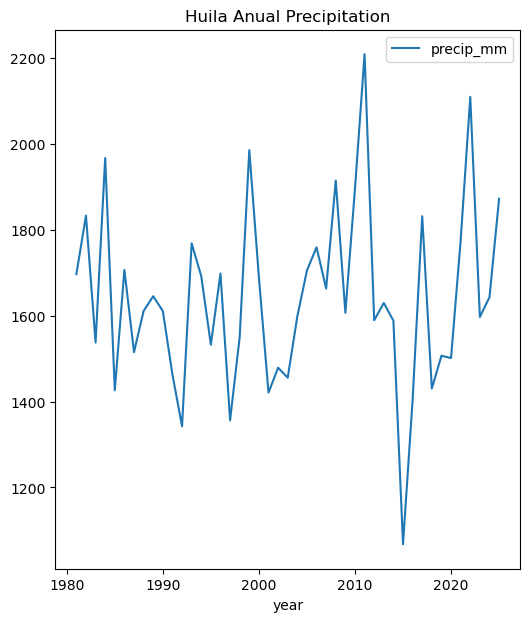

In [12]:
df_hu[['year','precip_mm']].groupby('year').sum().plot(figsize=(6,7), title='Huila Anual Precipitation')

<Axes: title={'center': 'Huila anual mean temperature'}, xlabel='year'>

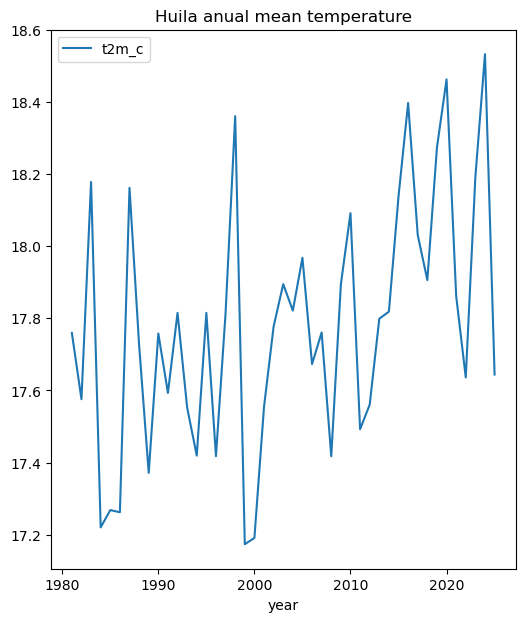

In [13]:
df_hu[['year','t2m_c']].groupby('year').mean().plot(figsize=(6,7), title='Huila anual mean temperature')

In [15]:
# filter islands of san andres and providencia, no data for them
df_all = df_all[df_all['state_name']!='San Andres Y Providencia']

In [16]:
# drop 1980 data
df_all = df_all[df_all['year']>1980]

In [18]:
# save Colombia weather data
df_all.to_csv(output_file + "co_weather.csv")